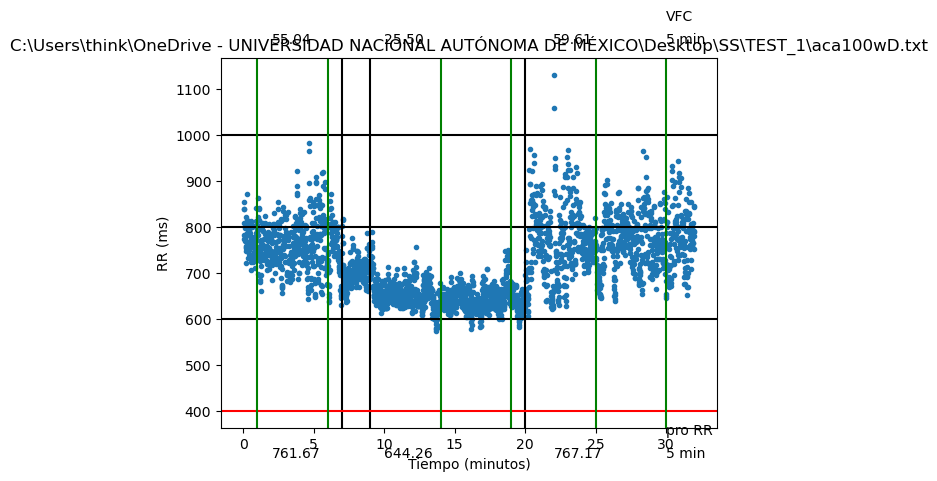

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
raizDos = np.sqrt(2)

# Load data from the specified file
nombre = r'C:\Users\think\OneDrive - UNIVERSIDAD NACIONAL AUTÓNOMA DE MÉXICO\Desktop\SS\TEST_1\aca100wD.txt'
AA = np.loadtxt(nombre)
RR = AA[:, 1]  # Extract second column (RR intervals)

# Determine the size of the RR array
tamRR = len(RR)

# Initialize control variables for finding specific time intervals
contadores = {'1': 0, '5': 0, '6': 0, '7': 0, '9': 0, '14': 0, 
              '18': 0, '19': 0, '20': 0, '25': 0, '30': 0, '31': 0}

# Iterate through the RR array, removing zeros and storing time intervals
nRR = []
ejeTiempoMinutos = []
ijk = 0
for ii in range(tamRR):
    if RR[ii] > 0:
        ijk += 1
        nRR.append(RR[ii])
        ejeTiempoMinutos.append(AA[ii, 0])
        
        # Check for specific time intervals
        for key in contadores:
            if contadores[key] == 0 and ejeTiempoMinutos[-1] > int(key):
                globals()[f"ijk{key}"] = ijk
                contadores[key] = 1

# Convert lists to numpy arrays
nRR = np.array(nRR)
ejeTiempoMinutos = np.array(ejeTiempoMinutos)

# Mean and standard deviation for various time segments
pRepMin1a6 = np.mean(nRR[globals()["ijk1"]:globals()["ijk6"]])
vRepMin1a6 = np.std(nRR[globals()["ijk1"]:globals()["ijk6"]])

pEjerMin14a19 = np.mean(nRR[globals()["ijk14"]:globals()["ijk19"]])
vEjerMin14a19 = np.std(nRR[globals()["ijk14"]:globals()["ijk19"]])

pRecMin25a30 = np.mean(nRR[globals()["ijk25"]:globals()["ijk30"]])
vRecMin25a30 = np.std(nRR[globals()["ijk25"]:globals()["ijk30"]])

# Plot the data
plt.figure()
plt.plot(ejeTiempoMinutos, nRR, '.')
plt.axvline(x=7, color='k')
plt.axvline(x=9, color='k')
plt.axvline(x=20, color='k')
plt.axhline(y=400, color='r')
plt.axhline(y=600, color='k')
plt.axhline(y=800, color='k')
plt.axhline(y=1000, color='k')
plt.axvline(x=1, color='g')
plt.axvline(x=6, color='g')
plt.axvline(x=14, color='g')
plt.axvline(x=19, color='g')
plt.axvline(x=25, color='g')
plt.axvline(x=30, color='g')

# Add annotations
plt.text(2, 1200, f'{vRepMin1a6:.2f}')
plt.text(2, 300, f'{pRepMin1a6:.2f}')
plt.text(10, 1200, f'{vEjerMin14a19:.2f}')
plt.text(10, 300, f'{pEjerMin14a19:.2f}')
plt.text(22, 1200, f'{vRecMin25a30:.2f}')
plt.text(22, 300, f'{pRecMin25a30:.2f}')
plt.text(30, 1250, 'VFC')
plt.text(30, 1200, '5 min')
plt.text(30, 350, 'pro RR')
plt.text(30, 300, '5 min')

plt.title(nombre)
plt.xlabel('Tiempo (minutos)')
plt.ylabel('RR (ms)')
plt.show()